In [1]:
# Improve by ChatGPT & GitHub Copilot
# Running the requierements.ipynb
%run /bettik/PROJECTS/pr-data-ocean/riverama/Notebooks/OSSE_generator/requierements.ipynb
# Loading the data 
%run /bettik/PROJECTS/pr-data-ocean/riverama/Notebooks/OSSE_generator/Exercises_on_CALEDO/data_loading.ipynb #january 2014

# Exercises on CALEDO

## 1D Plotting

### SSH Time Series

Plot the time serie of SSH at a certain point (e. g. LON : E 167° ; LAT S 24°) over 1 month

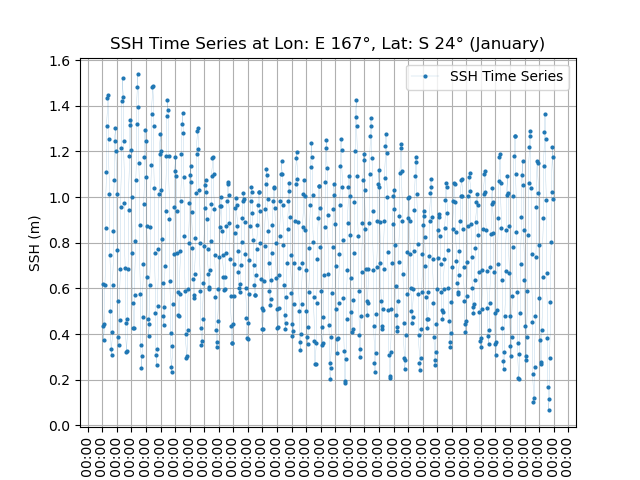

In [2]:
# Coordinates of the point of interest
lon_target = 167.0  # Longitude E 167°
lat_target = -24.0  # Latitude S 24° (negative for South)

# Find the closest grid point. This example uses simple Euclidean distance
# for demonstration, assuming a small region and not accounting for the
# curvature of the Earth. For large regions, consider using geopy or
# another method to calculate distances more accurately.
# Calculate the absolute difference between the target longitude and the grid longitudes
abs_diff_lon = np.abs(SSH_01['nav_lon'] - lon_target)
# Calculate the absolute difference between the target latitude and the grid latitudes
abs_diff_lat = np.abs(SSH_01['nav_lat'] - lat_target)
# Find the index of the minimum difference sum (closest point)
min_diff = (abs_diff_lon + abs_diff_lat).argmin()
# Convert the flat index to a 2D index
closest_point = np.unravel_index(min_diff, SSH_01['nav_lon'].shape)

# Extract the SSH time series data for the closest grid point
ssh_time_series = SSH_01['zos'][:, closest_point[0], closest_point[1]]

# Plot the time series data
plt.figure(#figsize=(17, 6)  # Optional: Set the figure size
           )
plt.plot(SSH_01['time_counter'], ssh_time_series, label='SSH Time Series',
         marker='.', markersize=4,  # Plot markers with size 4
         linestyle='-', linewidth=0.1,  # Line style and width
         #linestyle='none'  # Optional: Uncomment to use no line style
         )
plt.xlabel('Time')  # Set the x-axis label
plt.ylabel('SSH (m)')  # Set the y-axis label
plt.title('SSH Time Series at Lon: E 167°, Lat: S 24° (January)')  # Set the plot title
plt.legend()  # Display the legend
plt.grid(True)  # Enable grid lines
# Set daily x-axis markers
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
# Format the x-axis date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.show()  # Display the plot


### Multiple Time Series

Plot the time series of SSH at 3 different points (on the same plot) over 1 month

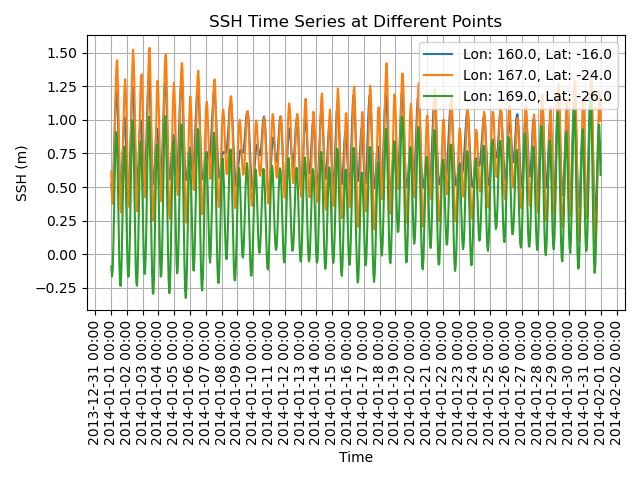

In [3]:
# Define the list of points of interest with their respective longitudes and latitudes
points = [
    {'lon': 160.0, 'lat': -16.0},  # Point 1
    {'lon': 167.0, 'lat': -24.0},  # Point 2
    {'lon': 169.0, 'lat': -26.0}   # Point 3
]

# Plotting
plt.figure(#figsize=(17, 6)  # Optional: Set the figure size
           )

# Loop through each point in the list of points
for point in points:
    # Extract the target longitude and latitude for the current point
    lon_target, lat_target = point['lon'], point['lat']
    # Calculate the absolute difference between the target longitude and the grid longitudes
    abs_diff_lon = np.abs(SSH_01['nav_lon'] - lon_target)
    # Calculate the absolute difference between the target latitude and the grid latitudes
    abs_diff_lat = np.abs(SSH_01['nav_lat'] - lat_target)
    # Find the index of the minimum difference sum (closest point)
    min_diff = (abs_diff_lon + abs_diff_lat).argmin()
    # Convert the flat index to a 2D index
    closest_point = np.unravel_index(min_diff, SSH_01['nav_lon'].shape)
    
    # Extract the SSH time series data for the closest grid point
    ssh_time_series = SSH_01['zos'][:, closest_point[0], closest_point[1]]
    
    # Plot the SSH time series data for the current point
    plt.plot(SSH_01['time_counter'], ssh_time_series, label=f'Lon: {lon_target}, Lat: {lat_target}')

# Set the x-axis label
plt.xlabel('Time')
# Set the y-axis label
plt.ylabel('SSH (m)')
# Set the plot title
plt.title('SSH Time Series at Different Points')
# Display the legend
plt.legend()
# Enable grid lines
plt.grid(True)
# Set daily x-axis markers
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
# Format the x-axis date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Adjust the subplot parameters to give some padding
plt.tight_layout()
# Display the plot
plt.show()

### Moving Average

Plot the moving average with a window of 2 days of the SSH over 1 month, compare with raw SSH.

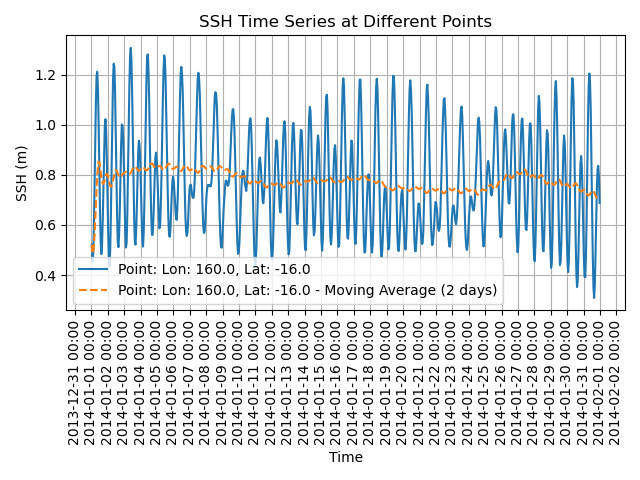

In [4]:
points = [
    {'lon': 160.0, 'lat': -16.0},  # Point 1
    # {'lon': 167.0, 'lat': -24.0},  # Point 2 (Commented out)
    # {'lon': 169.0, 'lat': -26.0}   # Point 3 (Commented out)
]

# Plotting
plt.figure(#figsize=(10, 6)  # Optional: Set the figure size
           )

for point in points:
    lon_target, lat_target = point['lon'], point['lat']
    abs_diff_lon = np.abs(SSH_01['nav_lon'] - lon_target)
    abs_diff_lat = np.abs(SSH_01['nav_lat'] - lat_target)
    min_diff = (abs_diff_lon + abs_diff_lat).argmin()
    closest_point = np.unravel_index(min_diff, SSH_01['nav_lon'].shape)
    
    ssh_time_series = SSH_01['zos'][:, closest_point[0], closest_point[1]]
    
    # Compute moving average with a window of 2 days (48 hours)
    # Assuming 'time_counter' is in hours, we use a window of 48 for 2 days
    moving_avg = ssh_time_series.rolling(dim={'time_counter': 48}, min_periods=1).mean()
    
    # Plot the SSH time series data for the current point
    plt.plot(SSH_01['time_counter'], ssh_time_series, label=f'Point: Lon: {lon_target}, Lat: {lat_target}')
    # Plot the moving average time series data for the current point
    plt.plot(SSH_01['time_counter'], moving_avg, label=f'Point: Lon: {lon_target}, Lat: {lat_target} - Moving Average (2 days)', linestyle='--')

# Set the x-axis label
plt.xlabel('Time')
# Set the y-axis label
plt.ylabel('SSH (m)')
# Set the plot title
plt.title('SSH Time Series at Different Points')
# Display the legend
plt.legend()
# Enable grid lines
plt.grid(True)
# Set daily x-axis markers
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
# Format the x-axis date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Adjust the subplot parameters to give some padding
plt.tight_layout()
# Display the plot
plt.show()
